Descriptive Statistics:
                                date           open           high  \
count                         497461  497461.000000  497461.000000   
mean   2016-01-06 17:16:56.524310016      86.352275      87.132717   
min              2014-01-02 00:00:00       1.620000       1.690000   
25%              2015-01-08 00:00:00      41.690000      42.090000   
50%              2016-01-11 00:00:00      64.970000      65.560000   
75%              2017-01-06 00:00:00      98.410000      99.230000   
max              2017-12-29 00:00:00    2044.000000    2067.990000   
std                              NaN     101.471228     102.312340   

                 low          close        volume  
count  497461.000000  497461.000000  4.974610e+05  
mean       85.552616      86.368586  4.253695e+06  
min         1.500000       1.590000  1.010000e+02  
25%        41.280000      41.700000  1.080183e+06  
50%        64.357400      64.980000  2.085013e+06  
75%        97.580000      98.4200

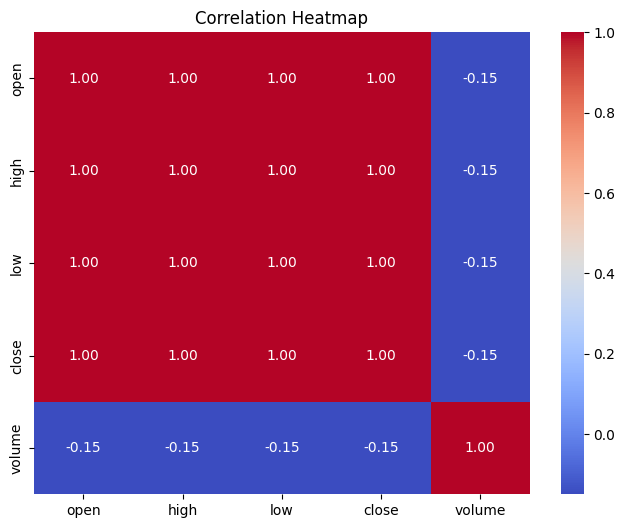

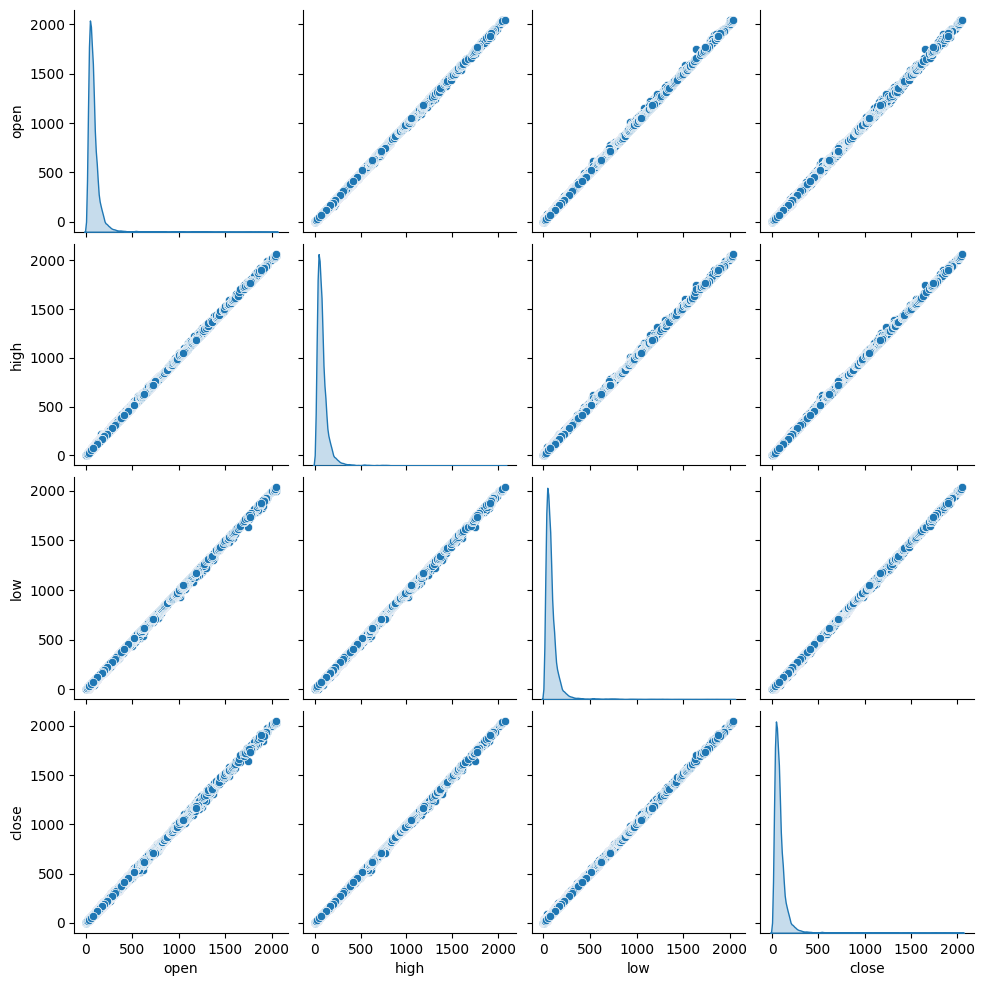

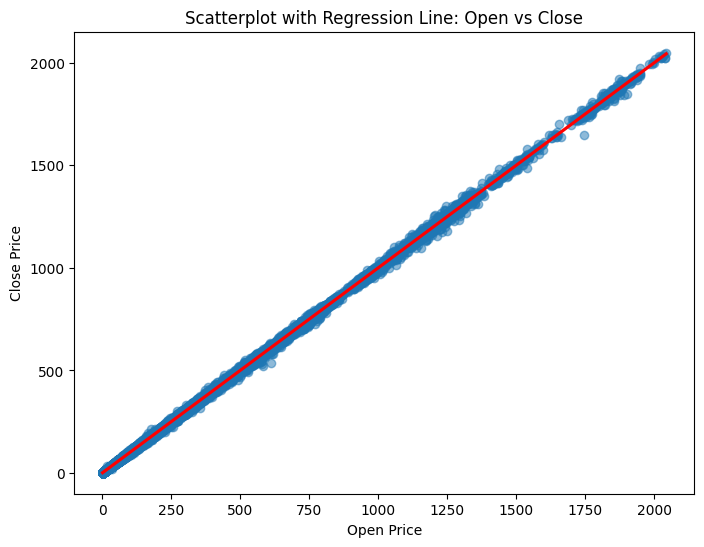

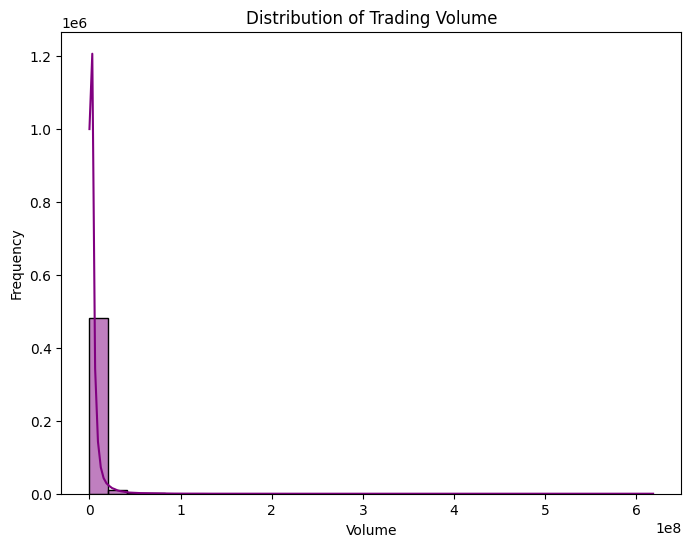

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


file_path = "C:\\Users\\Giridharan\\Downloads\\S&P+500+Stock+Prices+2014-2017.csv\\S&P 500 Stock Prices 2014-2017.csv"
data = pd.read_csv(file_path)


data['date'] = pd.to_datetime(data['date'])  # Convert 'date' to datetime format
data = data.dropna()  # Drop rows with missing values


# Descriptive Statistics for Numeric Columns
print("Descriptive Statistics:")
print(data.describe())

# Correlation Matrix for Multivariate Variables
correlation_matrix = data[['open', 'high', 'low', 'close', 'volume']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Pearson and Spearman Correlation Coefficients (Example: 'open' and 'close')
pearson_corr, _ = pearsonr(data['open'], data['close'])
spearman_corr, _ = spearmanr(data['open'], data['close'])
print(f"\nPearson Correlation (open vs close): {pearson_corr:.4f}")
print(f"Spearman Correlation (open vs close): {spearman_corr:.4f}")


# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for Visualizing Relationships (Multivariate)
sns.pairplot(data[['open', 'high', 'low', 'close']], diag_kind="kde")
plt.show()

# Scatterplot with Regression Line (Example: 'open' vs 'close')
plt.figure(figsize=(8, 6))
sns.regplot(x='open', y='close', data=data, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("Scatterplot with Regression Line: Open vs Close")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

# Volume Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['volume'], bins=30, kde=True, color="purple")
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load dataset
data = pd.read_csv("C:\\Users\\Giridharan\\Downloads\\S&P+500+Stock+Prices+2014-2017.csv\\S&P 500 Stock Prices 2014-2017.csv")

# ----------------------------
# Step 1: Non-Graphical Analysis (Statistical)
# ----------------------------

# Basic information
print("Dataset Information:")
print(data.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Central Tendency
print("\nCentral Tendency:")
means = data.mean(numeric_only=True)
medians = data.median(numeric_only=True)
modes = data.mode().iloc[0]
print(f"Means:\n{means}")
print(f"Medians:\n{medians}")
print(f"Modes:\n{modes}")

# Dispersion
print("\nDispersion Measures:")
std_devs = data.std(numeric_only=True)
variances = data.var(numeric_only=True)
print(f"Standard Deviations:\n{std_devs}")
print(f"Variances:\n{variances}")

# Correlation and Covariance
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)

print("\nCovariance Matrix:")
covariance_matrix = data.cov()
print(covariance_matrix)

# Statistical Correlation Coefficients
print("\nStatistical Correlations (Sample Pearson & Spearman):")
for col1 in data.select_dtypes(include=[np.number]).columns:
    for col2 in data.select_dtypes(include=[np.number]).columns:
        if col1 != col2:
            pearson_corr, _ = pearsonr(data[col1].dropna(), data[col2].dropna())
            spearman_corr, _ = spearmanr(data[col1].dropna(), data[col2].dropna())
            print(f"{col1} vs {col2} - Pearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}")

# Frequency counts for categorical variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nFrequency Counts for Categorical Data:")
for col in categorical_cols:
    print(f"{col}:\n{data[col].value_counts()}")

# ----------------------------
# Step 2: Graphical Analysis (Visualization)
# ----------------------------

# Visualize distributions for numerical data
numerical_cols = data.select_dtypes(include=[np.number]).columns

print("\nVisualizing Distributions for Numerical Data:")
for col in numerical_cols:
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots for numerical data
print("\nVisualizing Boxplots for Numerical Data:")
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Pair Plot for Multivariate Relationships
print("\nPair Plot for Numerical Variables:")
sns.pairplot(data[numerical_cols])
plt.show()

# Correlation Heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatterplots for significant correlations (if applicable)
print("\nScatterplots for Selected Variable Pairs:")
# Replace with your variable pairs
variable_pairs = [('variable1', 'variable2'), ('variable3', 'variable4')]  # Example
for var1, var2 in variable_pairs:
    if var1 in data.columns and var2 in data.columns:
        sns.scatterplot(data=data, x=var1, y=var2)
        plt.title(f"{var1} vs {var2}")
        plt.show()

# Bar charts for categorical data
print("\nBar Charts for Categorical Data:")
for col in categorical_cols:
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.show()

# Categorical vs Numerical Analysis
print("\nBoxplots for Categorical vs Numerical Data:")
# Replace categorical_col and numerical_col with appropriate column names
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        sns.boxplot(data=data, x=cat_col, y=num_col)
        plt.title(f"{num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

# ----------------------------
# Step 3: Inference
# ----------------------------
print("\nInference:")
print("1. Analyze the statistical and graphical results.")
print("2. Identify patterns, trends, and relationships.")
print("3. Highlight significant observations based on your findings.")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None

Summary Statistics:
                open           high            low          close  \
count  497461.000000  497464.000000  497464.000000  497472.000000   
mean       86.352275      87.132562      85.552467      86.369082   
std       101.471228     102.312062     100.570957     101.472407   
min         1.620000       1.690000       1.500000       1.590000   
25%        41.690000      42.090000      41.280000      41.703750   
50%        64.970000    

ValueError: could not convert string to float: 'AAL'


Correlation Matrix (Numeric Columns):
            open      high       low     close    volume
open    1.000000  0.999941  0.999928  0.999876 -0.148724
high    0.999941  1.000000  0.999905  0.999938 -0.148344
low     0.999928  0.999905  1.000000  0.999941 -0.149284
close   0.999876  0.999938  0.999941  1.000000 -0.148839
volume -0.148724 -0.148344 -0.149284 -0.148839  1.000000

Covariance Matrix (Numeric Columns):
                open          high           low         close        volume
open    1.029641e+04  1.038114e+04  1.020435e+04  1.029516e+04 -1.242341e+08
high    1.038114e+04  1.046776e+04  1.028865e+04  1.038109e+04 -1.249430e+08
low     1.020435e+04  1.028865e+04  1.011452e+04  1.020446e+04 -1.235950e+08
close   1.029516e+04  1.038109e+04  1.020446e+04  1.029665e+04 -1.243303e+08
volume -1.242341e+08 -1.249430e+08 -1.235950e+08 -1.243303e+08  6.776812e+13


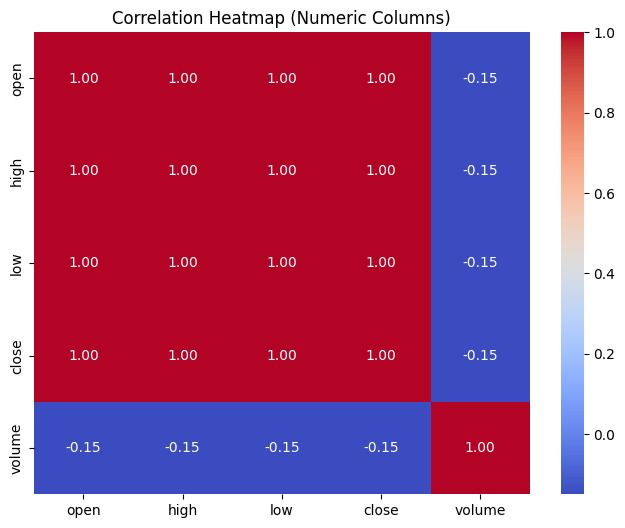

In [5]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix for numeric columns
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix (Numeric Columns):")
print(correlation_matrix)

# Covariance Matrix for numeric columns
covariance_matrix = numeric_data.cov()
print("\nCovariance Matrix (Numeric Columns):")
print(covariance_matrix)

# Visualize the Correlation Matrix with a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()
